In [33]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
normal_data = np.load("../data/WADI/normal_pc4.npy")
anomaly_data = np.load("../data/WADI/anomaly_pc4.npy")

In [28]:
X_train = np.concatenate((normal_data, anomaly_data[:, :-1]))

In [29]:
y_train = np.concatenate((np.zeros(len(normal_data)), np.ones(len(anomaly_data))))

In [30]:
clf = GradientBoostingClassifier(n_estimators=100, \
        learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [49]:
y_pred = clf.predict(X_train) 

In [47]:
pd.Series(y_pred).describe()

count    172801.000000
mean          0.675575
std           0.468161
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
dtype: float64

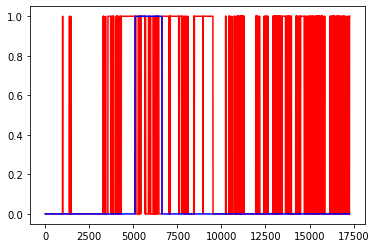

In [46]:
view_range = np.arange(0, int(len(anomaly_data)/10))
plt.plot(view_range, y_pred[len(normal_data):][view_range], color = "r")
plt.plot(view_range, y_train[len(normal_data):][view_range], color = "b")

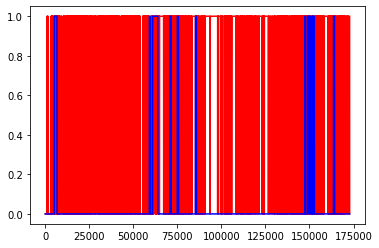

In [48]:
view_range = np.arange(0, int(len(anomaly_data)/1))
plt.plot(view_range, y_pred[len(normal_data):][view_range], color = "r")
plt.plot(view_range, y_train[len(normal_data):][view_range], color = "b")

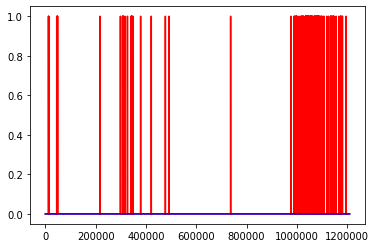

In [57]:
view_range = np.arange(0, int(len(normal_data)/1), 100)
plt.plot(view_range, y_pred[:len(normal_data)][view_range], color = "r")
plt.plot(view_range, y_train[:len(normal_data)][view_range], color = "b")

In [51]:
pd.Series(y_pred[:len(normal_data)]).describe()

count    1.209601e+06
mean     1.898312e-02
std      1.364653e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64

In [36]:
clf.score(X_train[len(normal_data):, :], y_train[len(normal_data):])

0.6755747941273488

In [37]:
clf.score(X_train, y_train)

0.9428364542296669

In [39]:
clf.score(X_train[:len(normal_data), :], y_train[:len(normal_data)])

0.9810168807730814

In [58]:
clf.score(X_train[len(normal_data):,:], np.zeros(len(anomaly_data)))

0.3244252058726512

In [59]:
clf.score(X_train[len(normal_data):,:], anomaly_data[:,-1])

0.32841245131683267

In [38]:
np.corrcoef(y_pred, anomaly_data[:,-1])

array([[ 1.        , -0.07669945],
       [-0.07669945,  1.        ]])